In [12]:
# importing libraries

# core and utility packages
import pandas as pd
import numpy as np
import itertools

# visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook')

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from keras import models
from keras.datasets import mnist
import keras

np.random.seed(2)

# test if GPU is detected
import tensorflow as tf
print(tf.test.is_built_with_cuda())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


True
Num GPUs Available:  1


In [13]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# formatting data
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


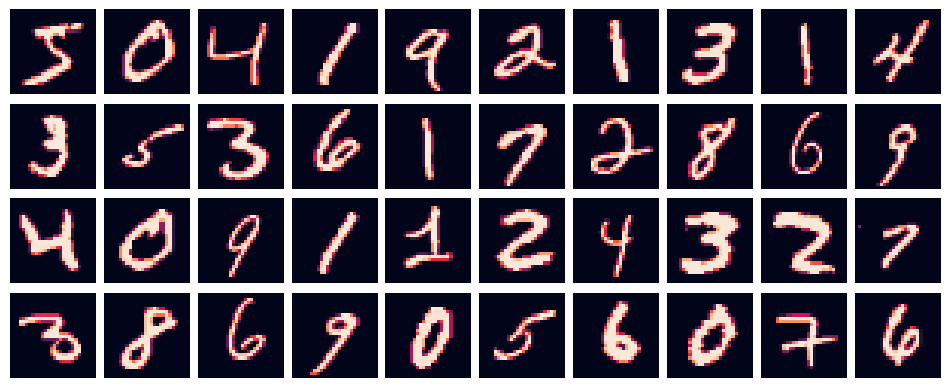

In [14]:
# preview images

# preview the images first
plt.figure(figsize=(12,4.8))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [15]:
# Convolutional NN

# Set the CNN model 
model = Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)        

In [16]:
# define optimizer
optimizer = Adam(learning_rate=1e-4)

In [17]:
# Turn epochs to 30 to get 0.9967 accuracy
epochs = 30 
batch_size = 86

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [18]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

print("The model has successfully trained")
model.save('model.h5')
print("Saving the model as model.h5")

Epoch 1/30
698/698 [==============================] - 6s 8ms/step - loss: 0.1470 - accuracy: 0.9610 - val_loss: 0.0581 - val_accuracy: 0.9851
Epoch 2/30
698/698 [==============================] - 6s 8ms/step - loss: 0.0312 - accuracy: 0.9914 - val_loss: 0.0333 - val_accuracy: 0.9903
Epoch 3/30
698/698 [==============================] - 6s 8ms/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 4/30
698/698 [==============================] - 6s 8ms/step - loss: 0.0100 - accuracy: 0.9975 - val_loss: 0.0226 - val_accuracy: 0.9937
Epoch 5/30
698/698 [==============================] - 6s 8ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0336 - val_accuracy: 0.9898
Epoch 6/30
698/698 [==============================] - 6s 8ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0335 - val_accuracy: 0.9907
Epoch 7/30
698/698 [==============================] - 6s 8ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0261 - val_accuracy: 0.9929
Epoch 

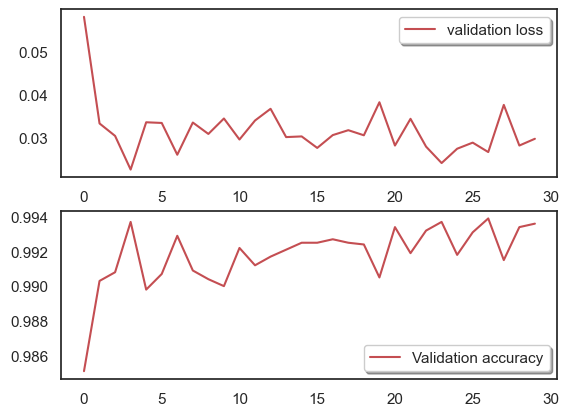

In [19]:
fig, ax = plt.subplots(2,1)
#ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

#ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

313/313 [==============================] - 1s 2ms/step


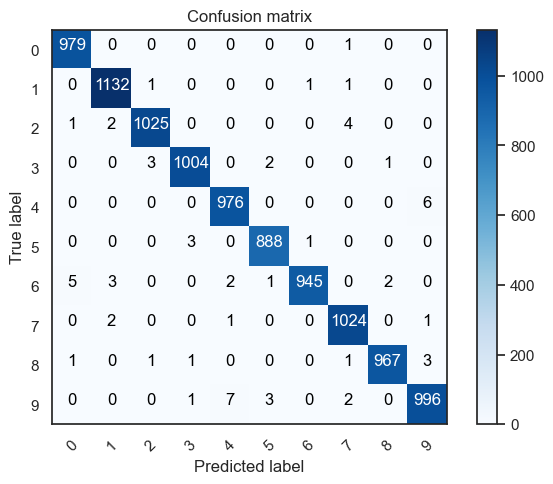

In [20]:
# confusion matrix

# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 